# Tutorial - Time Series Forecasting - Naive Approach

The goal is to forecast time series with the Naive Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function Naive with Air Passengers, and 4) Function Naive with Wine Sales.

References Analytics Vidhya - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [76]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Traffic%20Data%20-%20Train.csv'
df = pd.read_csv(url, nrows = 11856)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 3 columns):
ID          11856 non-null int64
Datetime    11856 non-null object
Count       11856 non-null int64
dtypes: int64(2), object(1)
memory usage: 278.0+ KB


In [77]:
#Creating train and test set 
train = df[0:10392] 
test = df[10392:]
#test.tail()

In [78]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\s\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\s\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


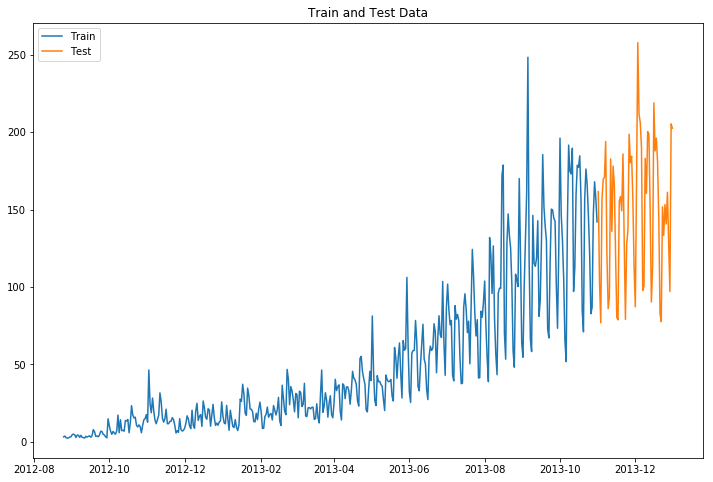

In [79]:
#Plotting data
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.legend(loc='best')
plt.show()

# Naive Approach with JetRail 
This method consists of replicating the value of the last day value and estimate the same value for the next day.

In [80]:
dd = np.asarray(train.Count)
lastvalue = dd[len(dd)-1]

In [81]:
y_hat = test.copy()
y_hat['naive'] = lastvalue
y_hat.describe()

,ID,Count,naive
count,61.000000,61.000000,61.0
mean,11123.500000,149.327869,142.0
std,426.070417,43.660077,0.0
min,10403.500000,76.833333,142.0
25%,10763.500000,113.416667,142.0
50%,11123.500000,155.416667,142.0
75%,11483.500000,183.083333,142.0
max,11843.500000,257.750000,142.0


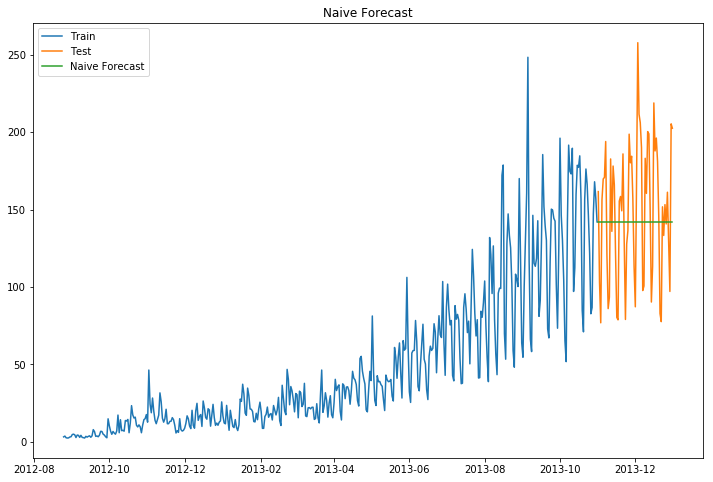

In [82]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

# RMSE Calculation

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

43.91640614391676


# Naive Approach with Air Passagers

In [158]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [159]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Month         100 non-null object
Passengers    100 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 100 to 143
Data columns (total 2 columns):
Month         44 non-null object
Passengers    44 non-null int64
dtypes: int64(1), object(1)
memory usage: 788.0+ bytes


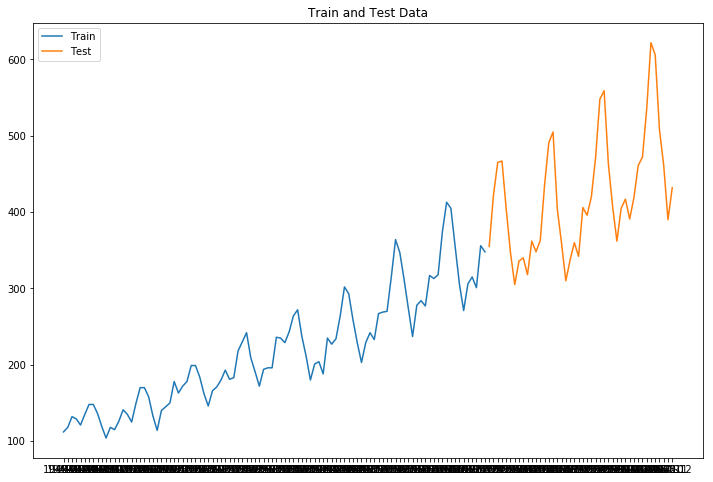

In [160]:
#Plotting data
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.Month, train['Passengers'], label='Train')
plt.plot(test.Month,test['Passengers'], label='Test')
plt.legend(loc='best')
plt.show()

In [161]:
dd = np.asarray(train.Passengers)
lastvalue = dd[len(dd)-1]
y_hat = test.copy()
y_hat['naive'] = lastvalue
y_hat.describe()

,Passengers,naive
count,44.000000,44.0
mean,421.068182,348.0
std,77.330279,0.0
min,305.000000,348.0
25%,359.750000,348.0
50%,406.500000,348.0
75%,465.500000,348.0
max,622.000000,348.0


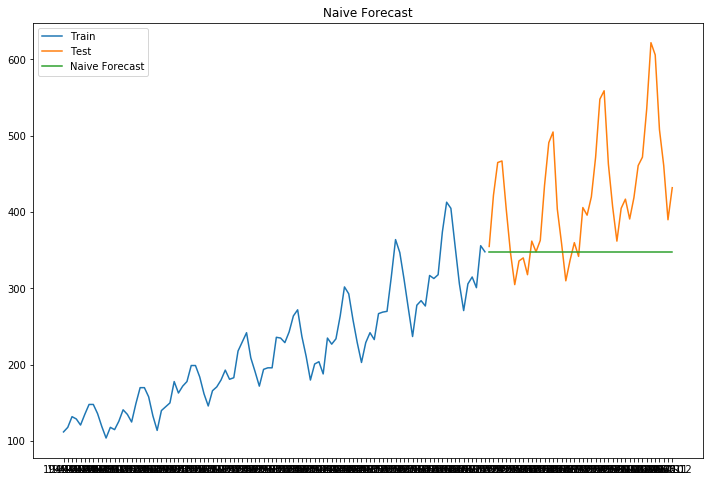

In [162]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train['Passengers'], label='Train')
plt.plot(test.Month,test['Passengers'], label='Test')
plt.plot(y_hat.Month,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.naive))
print(rms)

105.74981194911284


# Function Naive Approach

In [172]:
def naive_forecasting(mydf,coltime,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    dd = np.asarray(train[colval])
    lastvalue = dd[len(dd)-1]
    y_hat = test.copy()
    y_hat['naive'] = lastvalue
    #return y_hat, train, test
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train[coltime], train[colval], label='Train')
    plt.plot(test[coltime],test[colval], label='Test')
    plt.plot(y_hat[coltime],y_hat['naive'], label='Naive Forecast')
    plt.legend(loc='best')
    plt.title("Naive Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.naive))
    print('RMSE = '+str(rms))

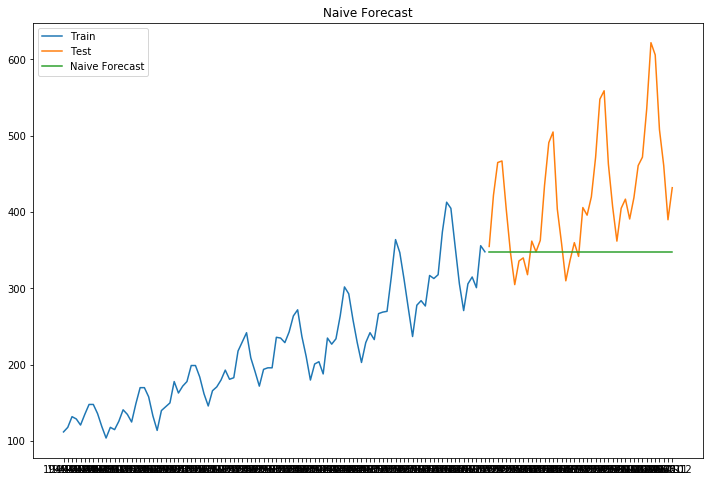

RMSE = 105.74981194911284


In [173]:
naive_forecasting(df,'Month','Passengers',0.7)

# Testing Function Naive Approach with Wine Dataset

In [175]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


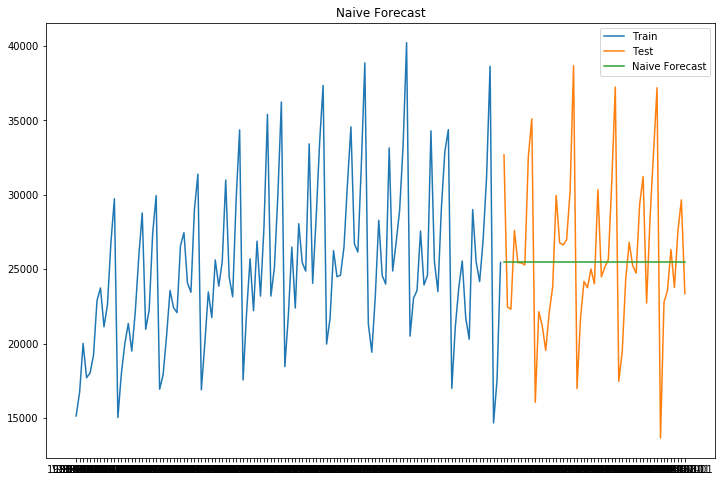

RMSE = 5207.9694862596225


In [176]:
naive_forecasting(df,'Date','Sales',0.7)